In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x = np.linspace(-1, 1, 200).reshape(-1, 1)   # (N, 1)
y = 2 * x + 1   

In [5]:
def relu(z):
    return np.maximum(0, z)

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [6]:
def train_one_hidden(hidden_units, lr=0.05, epochs=100):
    # Initialize weights and biases (small random for weights, zeros for biases)
    W1 = np.random.randn(1, hidden_units) * 0.1   # input -> hidden
    b1 = np.zeros((1, hidden_units))
    W2 = np.random.randn(hidden_units, 1) * 0.1   # hidden -> output
    b2 = np.zeros((1, 1))

    losses = []
    N = x.shape[0]

    for ep in range(epochs):
        # Forward pass
        z1 = x @ W1 + b1          # (N, hidden_units)
        a1 = relu(z1)             # (N, hidden_units)
        y_pred = a1 @ W2 + b2     # (N, 1)  linear output

        # Loss
        loss = mse(y, y_pred)
        losses.append(loss)

        # Backprop (batch)
        # dL/dy_pred
        dL_dy = (2.0 / N) * (y_pred - y)    # (N,1)

        # Gradients for W2 and b2
        dW2 = a1.T @ dL_dy                  # (hidden_units, 1)
        db2 = np.sum(dL_dy, axis=0, keepdims=True)  # (1,1)

        # Backprop into hidden layer
        delta_hidden = dL_dy @ W2.T         # (N, hidden_units)
        delta_hidden *= (z1 > 0).astype(float)  # ReLU derivative

        dW1 = x.T @ delta_hidden            # (1, hidden_units)
        db1 = np.sum(delta_hidden, axis=0, keepdims=True)  # (1, hidden_units)

        # Parameter updates (gradient descent)
        W2 -= lr * dW2
        b2 -= lr * db2
        W1 -= lr * dW1
        b1 -= lr * db1

    return losses

In [7]:
hidden_options = [1, 2, 4, 16, 64]   # try small -> large
results = {}
np.random.seed(0)   # make experiments repeatable

for h in hidden_options:
    results[h] = train_one_hidden(hidden_units=h, lr=0.05, epochs=150)

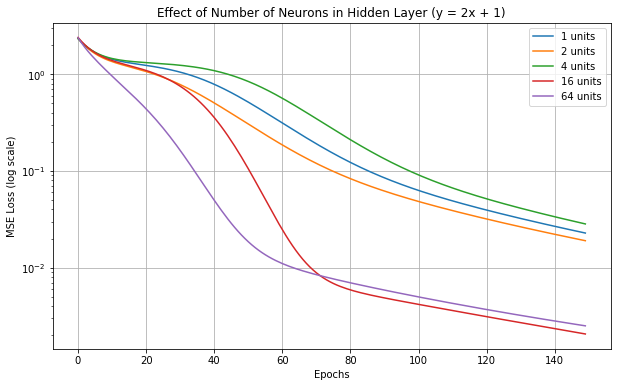

In [8]:
plt.figure(figsize=(10,6))
for h in hidden_options:
    plt.plot(results[h], label=f"{h} units")
plt.yscale('log')   # log scale helps compare magnitudes
plt.xlabel("Epochs")
plt.ylabel("MSE Loss (log scale)")
plt.title("Effect of Number of Neurons in Hidden Layer (y = 2x + 1)")
plt.legend()
plt.grid(True)
plt.show()